<a href="https://colab.research.google.com/github/KorhanErkan/TASJ_6-ABCDE/blob/master/TASK_6_A_B_C_D_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its parameters) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values. 

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 


--------------------------------------------------------------------------------------------------------------------------------------

TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB X : all columns except for the label Train-test split: .80-.20 (please use the stratify parameter) Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")

In [ ]:
data.head()

In [23]:
X = data.drop(["CDRGLOB"], axis = 1)
y = data.CDRGLOB

In [25]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
model = GaussianNB()


In [26]:
from sklearn.model_selection import train_test_split
# split the data with 80% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

model.fit(X1,y1)

GaussianNB()

In [27]:
from sklearn.model_selection import cross_val_score
for i in (5,10):
  score = cross_val_score(model, X1, y1, cv=i)
  print(score.mean())


0.6047064345451443
0.6010703363914374


K arttıkça ortalama skor düşüyor.

TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its parameters) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model3=KNeighborsClassifier()

param_grid = {"n_neighbors" : [5,6,7,8],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree","kd_tree", "brute"]}
for i in (5,10):
  grid = GridSearchCV(model3, param_grid, cv=i)
  grid_search = grid.fit(X,y)
  print(grid.best_params_)
  accuracy = grid_search.best_score_ *100
  print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
Accuracy for our training dataset with tuning is : 51.62%
{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
Accuracy for our training dataset with tuning is : 51.26%


CV değişkenlerinde seçilen grid aynı olsada CV = 5 skoru CV = 10 skoruna göre daha iyidir.


TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

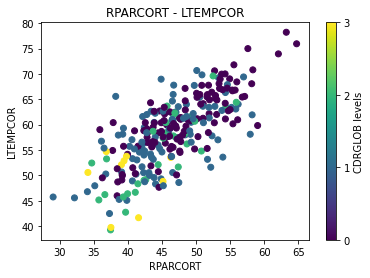

In [15]:
plt.scatter(X2["RPARCORT"], X2["LTEMPCOR"],c=y2)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

In [37]:
pre= grid.best_estimator_.fit(X1,y1).predict(X2)

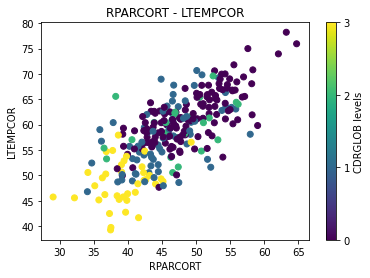

In [36]:
plt.scatter(X2["RPARCORT"], X2["LTEMPCOR"],c=pre)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.

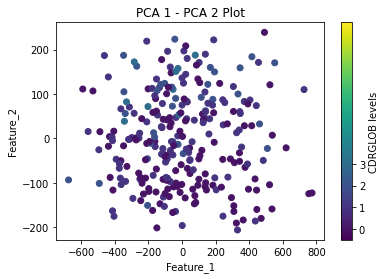

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(X2)
plt.scatter(pca_x[:,0], pca_x[:,1], c=y2)
plt.title("PCA 1 - PCA 2 Plot")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.xlabel ("Feature_1")
plt.ylabel ("Feature_2")
plt.clim(-0.5, 9.5);

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.

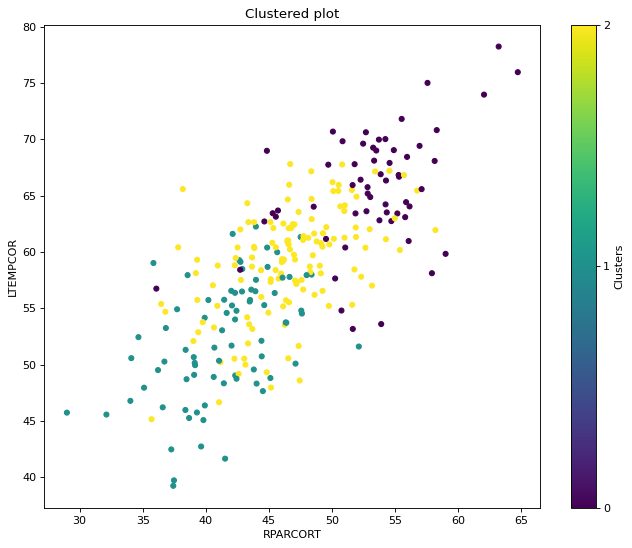

In [81]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state=0)
kmeans.fit_predict(X2)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2["RPARCORT"], X2["LTEMPCOR"],c=kmeans.fit_predict(X2), s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();